## 구글 드라이브와 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# koreanize-matplotlib 라이브러리 설치
!pip install koreanize-matplotlib

# matplotlib 라이브러리, matplotlib에서 한글을 사용하기 위한 라이브러리 임포트
import matplotlib.pyplot as plt
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.1 MB/s eta 0:00:00


In [ ]:
# 마운트된 드라이브 경로 확인
import os
project_path = '/content/gdrive/My Drive/sw융합프로젝트(1)/'

# 해당 폴더 내 파일 목록 확인
files = os.listdir(project_path)
print(files)

['행정구역(읍면동)', '행정구역(시군구)']


In [ ]:
# 필요한 라이브러리 설치 (처음 한 번만 실행)
!pip install geopandas matplotlib descartes

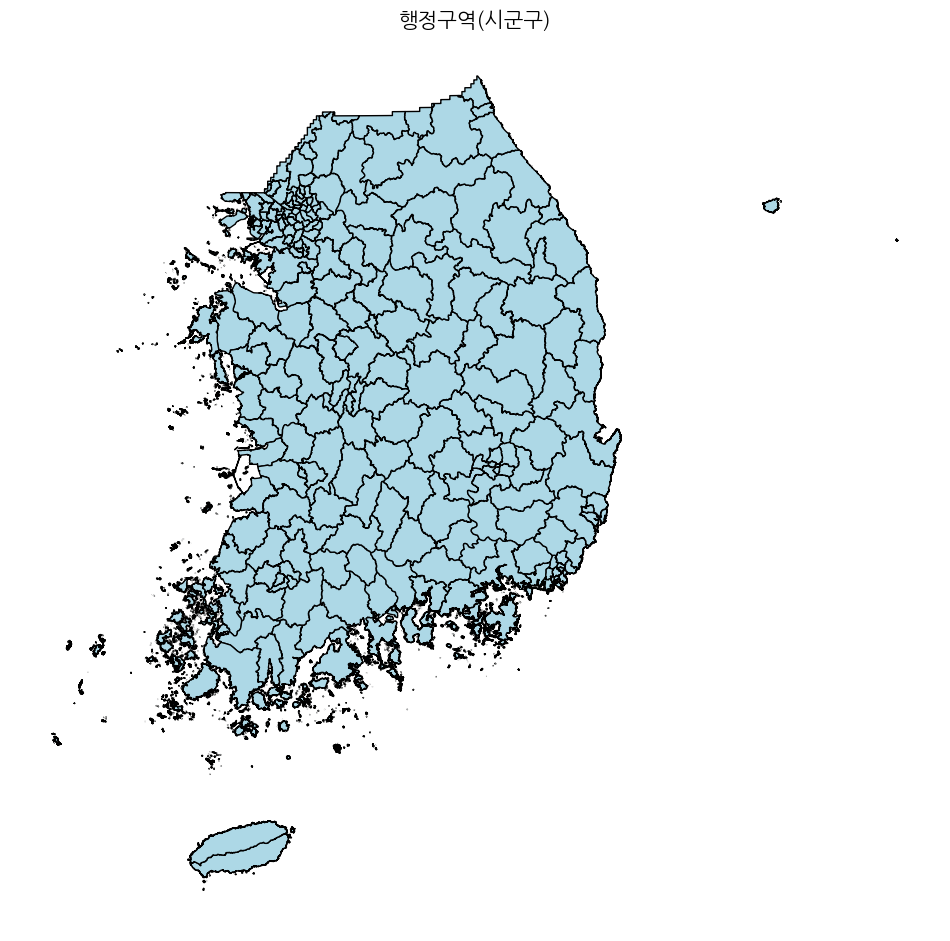

In [ ]:
# 라이브러리 임포트
import geopandas as gpd
import matplotlib.pyplot as plt

# Shapefile 경로 설정
project_path = '/content/gdrive/My Drive/sw융합프로젝트(1)/행정구역(시군구)'
shp_path = os.path.join(project_path, 'N3A_G0100000.shp')

# Shapefile 불러오기
gdf = gpd.read_file(shp_path)

# 기본 지도 시각화
gdf.plot(figsize=(12, 12), edgecolor='black', facecolor='lightblue')
plt.title('행정구역(시군구)', fontsize=15)
plt.axis('off')
plt.show()

In [ ]:
!pip install folium

import folium
import geopandas as gpd

# 좌표계 변환 (folium은 EPSG:4326 사용)
gdf = gdf.to_crs(epsg=4326)

# 중심 좌표 설정 (서울 기준 예시)
center = [37.5665, 126.9780]

# folium 지도 생성
m = folium.Map(location=center, zoom_start=11)

# GeoDataFrame을 지도에 추가
folium.GeoJson(
    gdf,
    name='행정구역(읍면동)',
    tooltip=folium.GeoJsonTooltip(fields=gdf.columns[:2].tolist())  # 필요한 컬럼만 표시 가능
).add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(gdf.columns)

Index(['UFID', 'BJCD', 'NAME', 'DIVI', 'SCLS', 'FMTA', 'geometry'], dtype='object')


In [ ]:
gdf.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,100037702079G01010100000000000000,4182000000,가평군,HJD006,G0018114,S2117243,"POLYGON ((239726.315 603866.31, 239744.583 603..."
1,100037709003G01010100000000000001,1168000000,강남구,HJD007,G0018115,S2115216,"POLYGON ((206088.785 545650.196, 206088.861 54..."
2,100037705076G01010100000000000002,1174000000,강동구,HJD007,G0018115,S2118444,"POLYGON ((213613.127 548346.002, 213612.276 54..."
3,100037808014G01010100000000000003,4215000000,강릉시,HJD005,G0018113,S2115670,"MULTIPOLYGON (((382143.761 559458.083, 382143...."
4,100037705041G01010100000000000004,1130500000,강북구,HJD007,G0018115,S2118444,"POLYGON ((200399.264 565046.926, 200487.338 56..."


In [ ]:
# 'BJCD'가 문자열이라면, 문자열 슬라이싱으로 앞 5자리 확인
gdf_incheon_seogu = gdf[gdf['BJCD'].astype(str).str.startswith('28260')]
gdf_incheon_seogu

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
118,100035913051G01010100000000000118,2826000000,서구,HJD007,G0018115,S2112586,"MULTIPOLYGON (((126.57772 37.54713, 126.57789 ..."


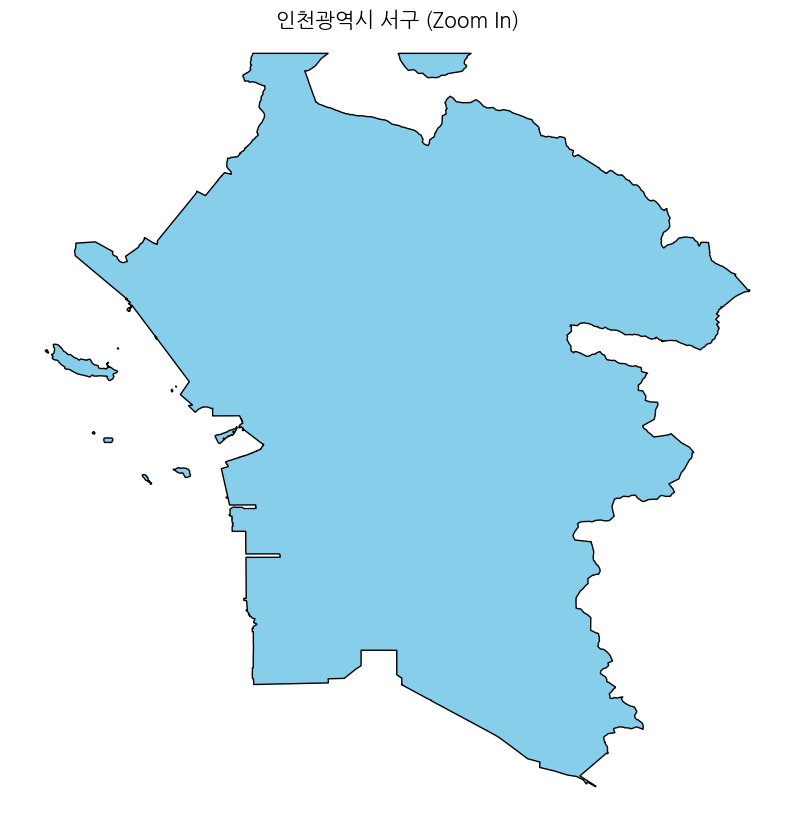

In [ ]:
import matplotlib.pyplot as plt

# 시각화
gdf_incheon_seogu.plot(
    figsize=(10, 10),
    edgecolor='black',
    facecolor='skyblue'
)

plt.title('인천광역시 서구 (Zoom In)', fontsize=15)
plt.axis('equal')  # 축 비율 유지
plt.axis('off')    # 눈금 제거
plt.show()


In [ ]:
# 2. 좌표계 변환 (folium은 WGS84, EPSG:4326 필요)
gdf_incheon_seogu = gdf_incheon_seogu.to_crs(epsg=4326)

# 3. 중심 좌표 설정 (인천 서구 중심 대략 위치)
center = [37.5445, 126.6762]

# 4. folium 지도 생성
m = folium.Map(location=center, zoom_start=12)

# 5. GeoJson 형태로 지도에 추가
folium.GeoJson(
    gdf_incheon_seogu,
    name='인천 서구',
    tooltip=folium.GeoJsonTooltip(fields=['NAME'], aliases=['행정동'])
).add_to(m)

# 6. 지도 출력
m